# Задача 1
Реализовать схему контроля аутентичности цифровых изображений на основе перцептивных хеш и стеганографических методов полухрупкой маркировки. Схема должна обеспечивать не только контроль аутентичности исходного изображения в целом, но также возможность локализации областей, подвергшихся искажениям низкочастотного характера (например, редактирование отдельных цифр/символов отсканированного текста).

после phash (8*8 - матрица из нулей и единиц)
алгоритм коха - применяется к phash F1(B_ij, phash, k??)
 - получается новое изображение I_hat 
 - и применяем функуию расстояния ||I - I_hat|| -> min  (jyb ljk;ys , они должны быть визуально похожи


применяем I => I_hat (применяем функцию расстояния ||I - I_hat|| не к оригиналу, а к подделаному оригиналу. Суть в том что оригинеального (не подделаного у нас нет) )


функция расстояния - растоянние по хеммингу

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy
from scipy import signal
from PIL import Image

In [11]:
# open original image and convert it to grayscale: (8-bit pixels, black and white)
img = Image.open('bridge.jpg').convert('L') 
img = np.array(img)
h, w = img.shape

blocksize = 64
dct_block = 32

# pad image with zeros (to fit blocks)
im = np.zeros(((h // blocksize + 1) * blocksize, (w // blocksize + 1) * blocksize))
im[:h, :w] = img
h, w = im.shape # new width and height

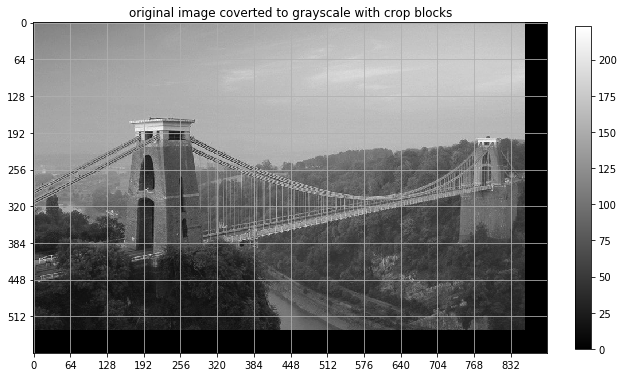

In [12]:
fig = plt.figure(figsize=(10,10))
# fig = plt.figure()                                                              
ax = fig.add_subplot(1,1,1)

x_ticks = np.arange(0, w, blocksize)
y_ticks = np.arange(0, h, blocksize)
ax.set_xticks(x_ticks) 
ax.set_yticks(y_ticks)
ax.grid()
plt.imshow(im, cmap='gray')
plt.colorbar(fraction=0.0289)
plt.title( "original image coverted to grayscale with crop blocks")

In [13]:
def dct2(a):
    '''2D DCT'''
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

In [14]:
dct = np.zeros(im.shape)

# Do 8x8 DCT on image (in-place)
for i in np.arange(0, h, dct_block):
    for j in np.arange(0, w, dct_block):
        dct[i:(i+32), j:(j+8)] = dct2(im[i:(i+8),j:(j+8)])

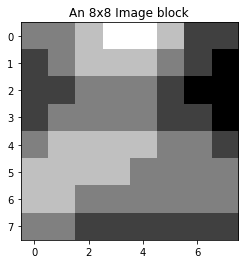

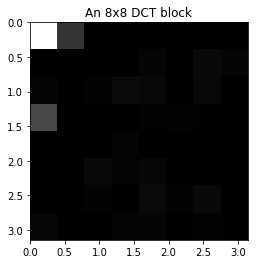

In [15]:
pos = 128

# Extract a block from image
plt.figure()
plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,np.pi,np.pi,0])
plt.title( "An 8x8 DCT block")

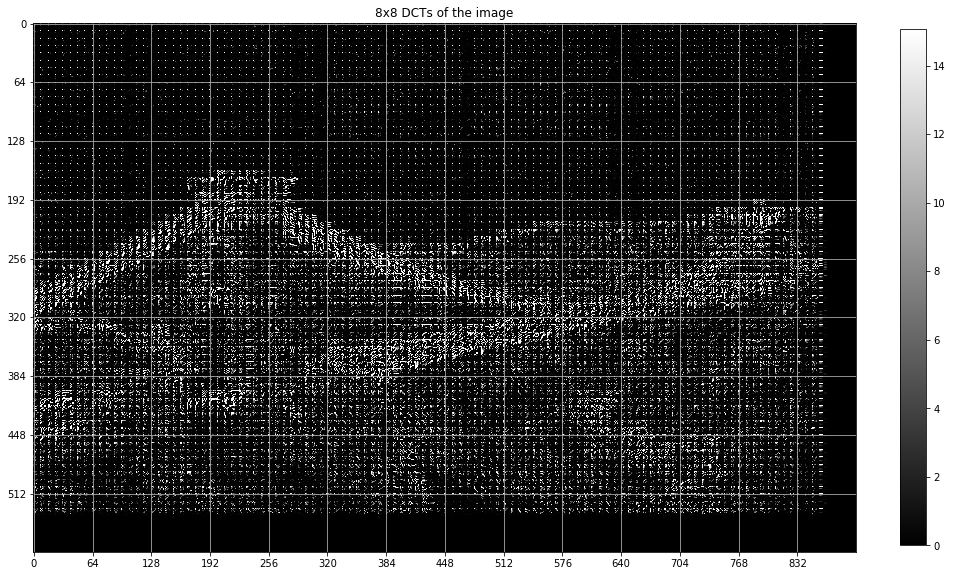

In [16]:
# Display entire DCT
fig = plt.figure(figsize=(16, 10))                                                              
ax = fig.add_subplot(1,1,1)
x_ticks = np.arange(0, w, blocksize)
y_ticks = np.arange(0, h, blocksize)  
ax.set_xticks(x_ticks) 
ax.set_yticks(y_ticks)
ax.grid()
# plt.imshow(dct,cmap='gray')
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.colorbar(fraction=0.0289)
plt.title( "8x8 DCTs of the image")

In [17]:
dct.shape

(576, 896)

In [18]:
im.shape

(576, 896)

In [21]:
cnn = np.zeros((dct.shape[0]//8, dct.shape[1]//8))

In [22]:
cnn.shape

(72, 112)

In [28]:
for i in np.arange(0, h - 8, 8):
    for j in np.arange(0, w - 8, 8):
        cnn[i, j] = np.sum(dct[i:(i+8), j:(j+8)])/64

IndexError: index 112 is out of bounds for axis 1 with size 112